# Study the distortion of the kinematical distributions when applying the event-selection cuts

In [1]:
import sys; sys.path.insert(0, '../..'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Xsec/Figures/distortion_of_distributions/'

In [3]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
print "%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay'

285009 ccqe candidate pairs, 187262 in FV
74387 are 1mu-1p, 39.7%
55226 are other pairs, 29.5%
155396 are cosmic, 83.0%
--------------------------------------------------------------
36843 are CC 1p 0pi, 19.7%
--------------------------------------------------------------
40729 are CC 1p, 21.7%
I finished loading overlay samples. We have in total 285009 pairs
155396 cosmic pairs and 74387 mu-p pairs in overlay


In [4]:
cuts_order  = ['no cut','Chi2Proton','Nflashes','MatchedFlash','length'
               ,'non-collinearity','vertex activity'
               ,'delta phi','Pt & delta phi']
cutlabels = ['preselection','$dE/dx$ profile',r'$N_{flashes}>0$','optical filter','track lengths'
             ,'non-collinearity','vertex activity'
             ,'coplanarity','$p_t<0.35$ GeV/c']
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,CC$1 p$ eff.,CC$1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi,CC 1p
no cut,100.0%,26.1%,100.0%,12.9%,100.0%,14.3%,no cut,100.0% (74387),100.0% (55226),100.0% (155396),100.0% (36843),100.0% (40729)
Chi2Proton,62.0%,73.0%,67.1%,39.2%,66.3%,42.7%,Chi2Proton,62.0% (46155),17.3% (9547),4.8% (7485),67.1% (24739),66.3% (26989)
Nflashes,61.7%,75.2%,66.8%,40.3%,65.9%,44.0%,Nflashes,61.7% (45931),17.2% (9495),3.6% (5664),66.8% (24612),65.9% (26859)
MatchedFlash,47.5%,81.1%,51.5%,43.6%,51.2%,47.8%,MatchedFlash,47.5% (35339),11.2% (6184),1.3% (2050),51.5% (18991),51.2% (20836)
length,43.1%,85.4%,47.3%,46.5%,46.6%,50.6%,length,43.1% (32061),6.8% (3754),1.1% (1707),47.3% (17430),46.6% (18980)
non-collinearity,39.7%,89.2%,45.1%,50.3%,44.2%,54.4%,non-collinearity,39.7% (29505),5.0% (2760),0.5% (795),45.1% (16627),44.2% (17993)
vertex activity,29.2%,90.6%,40.5%,62.3%,38.5%,65.5%,vertex activity,29.2% (21717),3.3% (1802),0.3% (443),40.5% (14922),38.5% (15689)
delta phi,20.2%,96.0%,31.9%,75.2%,29.9%,77.8%,delta phi,20.2% (15005),0.8% (451),0.1% (179),31.9% (11756),29.9% (12159)
Pt & delta phi,17.6%,96.8%,28.5%,77.6%,26.7%,80.3%,Pt & delta phi,17.6% (13113),0.6% (319),0.1% (119),28.5% (10514),26.7% (10877)


# what happens to the distributions after each of the cuts?

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


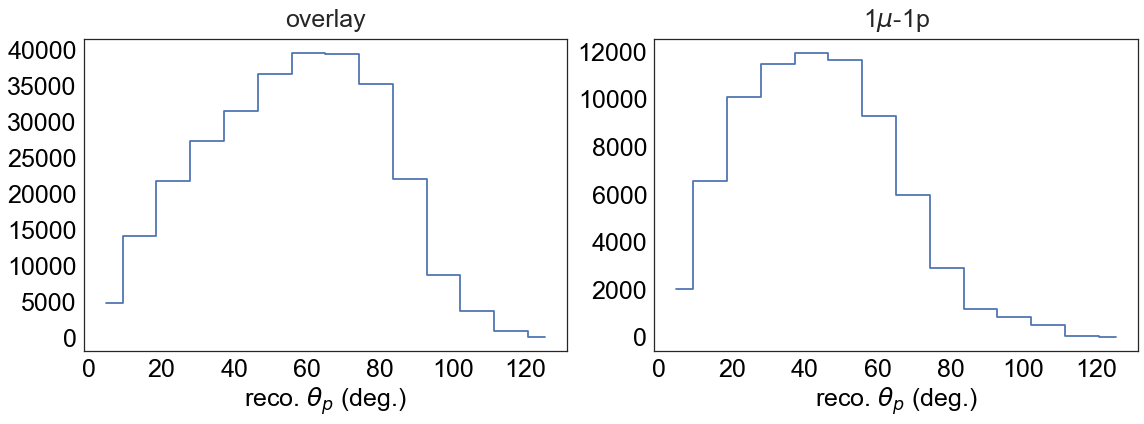

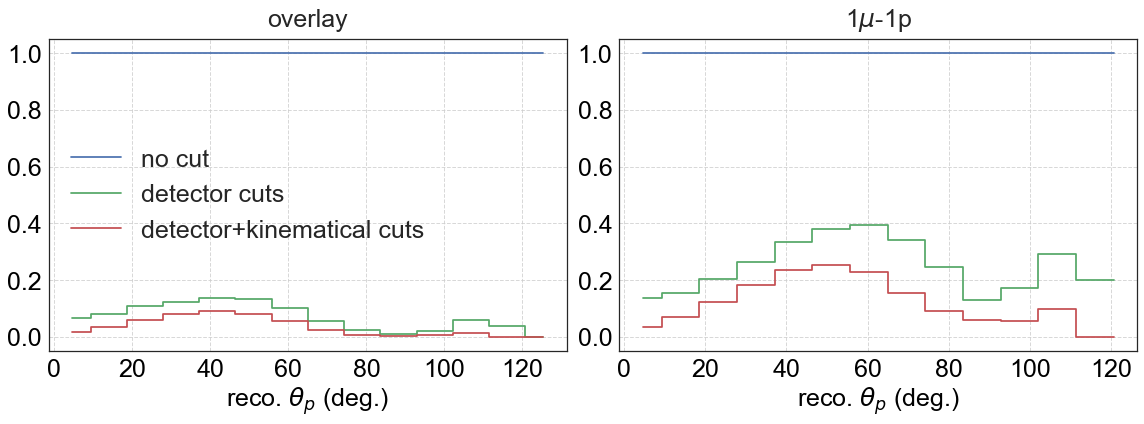

In [13]:
# var,x_label,bins = 'reco_Pmu_mcs','reco. (mcs) $p_{\mu}$ (GeV/c)',linspace(0,1.5,15)
# var,x_label,bins = 'reco_Pmu_mcs_theta',r'reco. $\theta_{\mu}$ (deg.)',linspace(0,150,15)
# var,x_label,bins = 'reco_Pp','reco. (range-based) $p_{p}$ (GeV/c)',linspace(0.1,1.3,15)
var,x_label,bins = 'reco_Pp_theta',r'reco. $\theta_{p}$ (deg.)',linspace(0,130,15)

mul=180./np.pi if 'deg' in x_label else 1
mid = 0.5*(bins[1:]+bins[:-1])

h,f = dict(),dict()
for cut in ['no cut','vertex activity','Pt & delta phi']:
    overlay_concat = pd.concat([reducedOverlay[cut]['1mu-1p'],reducedOverlay[cut]['cosmic'],reducedOverlay[cut]['other pairs']])
    mup = reducedOverlay[cut]['1mu-1p']
    
    for sam,slabel in zip( [overlay_concat,mup],['overlay','1$\mu$-1p']):
        h[slabel+' '+cut],_ = np.histogram( mul*sam[var] , bins=bins )
        f[slabel+' '+cut] = h[slabel+' '+cut].astype(np.float)/h[slabel+' no cut']
        
fig = plt.figure(figsize=(16,6))
for iax,(sam,slabel) in enumerate(zip( [overlay_concat,mup],['overlay','1$\mu$-1p'])):
    ax = fig.add_subplot(1,2,iax+1)
    plt.step( mid , h[slabel+' no cut'] , where='mid' , label=clabel )
    set_axes(ax,x_label,title=slabel)
plt.tight_layout()

fig = plt.figure(figsize=(16,6))
for iax,(sam,slabel) in enumerate(zip( [overlay_concat,mup],['overlay','1$\mu$-1p'])):
    ax = fig.add_subplot(1,2,iax+1)
    for cut,clabel in zip(['no cut','vertex activity','Pt & delta phi']
                          ,['no cut','detector cuts','detector+kinematical cuts']):
        plt.step( mid , f[slabel+' '+cut] , where='mid' , label=clabel )
    set_axes(ax,x_label,title=slabel,do_add_legend=True if iax==0 else False,do_add_grid=True,legend_loc='center left')
#     ax.set_yscale('log')
plt.tight_layout()